In [1]:

!pip install hmmlearn seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 kB 3.4 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm

In [3]:
states = ["Sunny", "Rainy"]


transition_matrix = np.array([
    [0.8, 0.2],
    [0.4, 0.6]
])

print("\nTransition Matrix:")
print(transition_matrix)


Transition Matrix:
[[0.8 0.2]
 [0.4 0.6]]


In [4]:
def simulate_markov_chain(start_state, n_steps=20):
    current_state = states.index(start_state)
    sequence = [start_state]

    for _ in range(n_steps):
        current_state = np.random.choice([0, 1], p=transition_matrix[current_state])
        sequence.append(states[current_state])

    return sequence

# Run simulation
mc_sequence = simulate_markov_chain("Sunny", 15)

print("\nGenerated Markov Chain Sequence:")
print(mc_sequence)


Generated Markov Chain Sequence:
['Sunny', 'Rainy', 'Sunny', 'Rainy', 'Rainy', 'Rainy', 'Rainy', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Sunny', 'Sunny', 'Sunny']


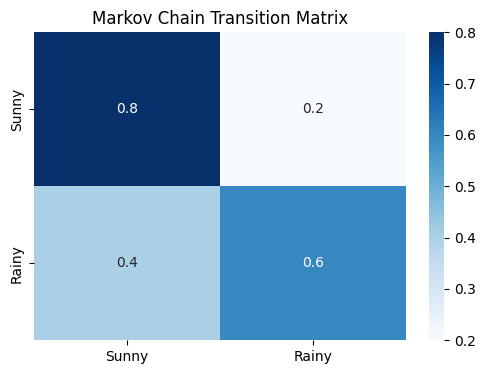

In [5]:
plt.figure(figsize=(6,4))
sns.heatmap(transition_matrix, annot=True, cmap="Blues",
            xticklabels=states, yticklabels=states)
plt.title("Markov Chain Transition Matrix")
plt.show()


In [6]:
print("\n=== HIDDEN MARKOV MODEL (HMM) EXAMPLE ===")

hidden_states = ["Hot", "Cold"]

observations = ["IceCream", "Coffee"]


model = hmm.MultinomialHMM(n_components=2, n_iter=50)

model.transmat_ = np.array([
    [0.7, 0.3],   # Hot -> Hot, Cold
    [0.4, 0.6]    # Cold -> Hot, Cold
])

model.emissionprob_ = np.array([
    [0.8, 0.2],   # Hot -> IceCream, Coffee
    [0.3, 0.7]    # Cold -> IceCream, Coffee
])


model.startprob_ = np.array([0.6, 0.4])

print("\nTransition Matrix (Hidden States):")
print(model.transmat_)

print("\nEmission Matrix:")
print(model.emissionprob_)


https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340



=== HIDDEN MARKOV MODEL (HMM) EXAMPLE ===

Transition Matrix (Hidden States):
[[0.7 0.3]
 [0.4 0.6]]

Emission Matrix:
[[0.8 0.2]
 [0.3 0.7]]


In [9]:
model.n_trials = 1
obs_seq, hidden_seq = model.sample(15)

obs_seq = obs_seq.flatten()
hidden_seq = hidden_seq.flatten()

# Convert numbers to labels
decoded_obs = [observations[i] for i in obs_seq]
decoded_hidden = [hidden_states[i] for i in hidden_seq]

print("\nGenerated Observations from HMM:")
print(decoded_obs)

print("\nActual Hidden States from HMM:")
print(decoded_hidden)


Generated Observations from HMM:
['Coffee', 'IceCream', 'Coffee', 'IceCream', 'IceCream', 'Coffee', 'IceCream', 'Coffee', 'IceCream', 'Coffee', 'IceCream', 'Coffee', 'IceCream', 'Coffee', 'Coffee', 'IceCream', 'IceCream', 'Coffee', 'Coffee', 'IceCream', 'IceCream', 'Coffee', 'Coffee', 'IceCream', 'Coffee', 'IceCream', 'IceCream', 'Coffee', 'Coffee', 'IceCream']

Actual Hidden States from HMM:
['Hot', 'Hot', 'Hot', 'Cold', 'Cold', 'Cold', 'Cold', 'Cold', 'Cold', 'Hot', 'Hot', 'Cold', 'Cold', 'Hot', 'Hot']


In [12]:
n_observations = len(observations)
X_decoded = np.zeros((len(obs_seq), n_observations))
X_decoded[np.arange(len(obs_seq)), obs_seq] = 1

logprob, predicted_states = model.decode(X_decoded, algorithm="viterbi")
decoded_predicted = [hidden_states[i] for i in predicted_states]

print("\nPredicted Hidden States (Viterbi):")
print(decoded_predicted)


Predicted Hidden States (Viterbi):
['Cold', 'Hot', 'Hot', 'Hot', 'Hot', 'Hot', 'Hot', 'Hot', 'Hot', 'Hot', 'Hot', 'Hot', 'Hot', 'Cold', 'Cold', 'Hot', 'Hot', 'Cold', 'Cold', 'Hot', 'Hot', 'Cold', 'Cold', 'Hot', 'Hot', 'Hot', 'Hot', 'Cold', 'Cold', 'Hot']


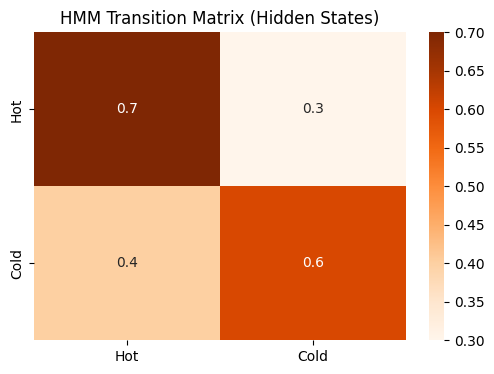

In [13]:

plt.figure(figsize=(6,4))
sns.heatmap(model.transmat_, annot=True, cmap="Oranges",
            xticklabels=hidden_states, yticklabels=hidden_states)
plt.title("HMM Transition Matrix (Hidden States)")
plt.show()

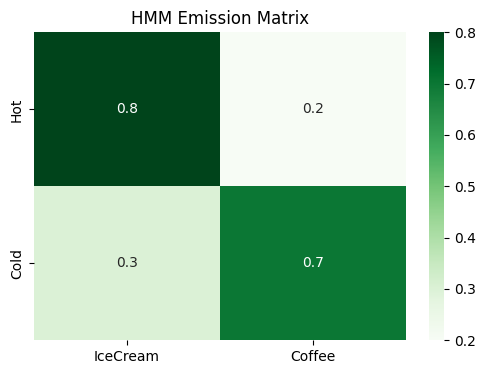

In [14]:
plt.figure(figsize=(6,4))
sns.heatmap(model.emissionprob_, annot=True, cmap="Greens",
            xticklabels=observations, yticklabels=hidden_states)
plt.title("HMM Emission Matrix")
plt.show()


=== USER'S SPEECH-LIKE HMM EXAMPLE ===

Most Likely Hidden States (Viterbi):
['Silence', 'Word1', 'Word2', 'Word2', 'Word3', 'Word3', 'Word3', 'Word3']


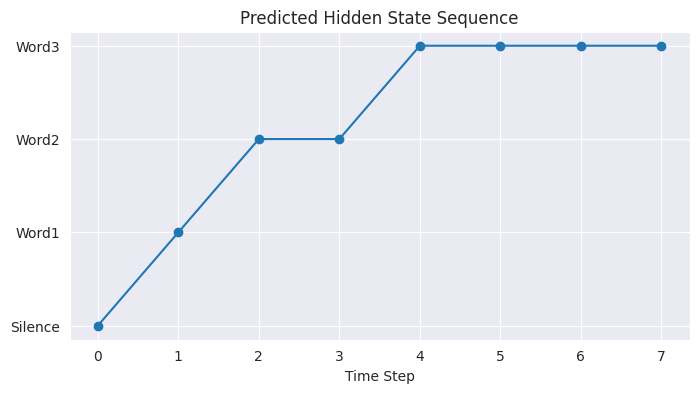

In [15]:

print("\n=== USER'S SPEECH-LIKE HMM EXAMPLE ===\n")

states = ["Silence", "Word1", "Word2", "Word3"]
n_states = len(states)

observations = ["Loud", "Soft"]
n_observations = len(observations)

start_probability = np.array([0.8, 0.1, 0.1, 0.0])

transition_probability = np.array([
    [0.7, 0.2, 0.1, 0.0],
    [0.0, 0.6, 0.4, 0.0],
    [0.0, 0.0, 0.6, 0.4],
    [0.0, 0.0, 0.0, 1.0]
])

emission_probability = np.array([
    [0.7, 0.3],
    [0.4, 0.6],
    [0.6, 0.4],
    [0.3, 0.7]
])

model2 = hmm.CategoricalHMM(n_components=n_states)
model2.startprob_ = start_probability
model2.transmat_ = transition_probability
model2.emissionprob_ = emission_probability

observations_sequence = np.array([0, 1, 0, 0, 1, 1, 0, 1]).reshape(-1, 1)

hidden_states_predicted = model2.predict(observations_sequence)

print("Most Likely Hidden States (Viterbi):")
print([states[i] for i in hidden_states_predicted])

sns.set_style("darkgrid")
plt.figure(figsize=(8,4))
plt.plot(hidden_states_predicted, "-o")
plt.yticks(range(n_states), states)
plt.title("Predicted Hidden State Sequence")
plt.xlabel("Time Step")
plt.show()
